In [1]:
#Checking working directory
import os
os.getcwd()

'C:\\Users\\Dell\\Downloads'

In [2]:
import pandas as pd #For Data Crunching
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns #For Visualiztion
import matplotlib.pyplot as plt #For tight layout

In [3]:
#Import the data
Risk_Train_Data = pd.read_csv("C:/Users/Dell/Downloads/Credit_Risk_Test_data.csv")
Risk_Test_Data = pd.read_csv("C:/Users/Dell/Downloads/Credit_Risk_Test_data.csv")

In [4]:
Risk_Train_Data.shape

(367, 13)

In [5]:
Risk_Test_Data.shape

(367, 13)

In [6]:
Risk_Train_Data.describe(include = "all")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,367,356,367,357,367,344,367.000000,367.000000,362.000000,361.000000,338.000000,367,367
unique,367,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001995,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Urban,Y
freq,1,286,233,200,283,307,NaN,NaN,NaN,NaN,NaN,140,290
mean,NaN,NaN,NaN,NaN,NaN,NaN,4805.599455,1569.577657,136.132597,342.537396,0.825444,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,4910.685399,2334.232099,61.366652,65.156643,0.380150,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,28.000000,6.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2864.000000,0.000000,100.250000,360.000000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3786.000000,1025.000000,125.000000,360.000000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5060.000000,2430.500000,158.000000,360.000000,1.000000,NaN,NaN


In [7]:
Risk_Test_Data.describe(include = "all")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,367,356,367,357,367,344,367.000000,367.000000,362.000000,361.000000,338.000000,367,367
unique,367,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001995,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Urban,Y
freq,1,286,233,200,283,307,NaN,NaN,NaN,NaN,NaN,140,290
mean,NaN,NaN,NaN,NaN,NaN,NaN,4805.599455,1569.577657,136.132597,342.537396,0.825444,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,4910.685399,2334.232099,61.366652,65.156643,0.380150,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,28.000000,6.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2864.000000,0.000000,100.250000,360.000000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3786.000000,1025.000000,125.000000,360.000000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5060.000000,2430.500000,158.000000,360.000000,1.000000,NaN,NaN


In [8]:
train_cat_na = ["Gender","Married","Dependents","Self_Employed"]
test_cat_na = ["Gender","Dependents","Self_Employed"]

In [9]:
#missing value treatment for categorical independent variables
import statistics

for item in train_cat_na:
    Risk_Train_Data[item].fillna((statistics.mode(Risk_Train_Data[item])), inplace = True)
    
for item in test_cat_na:
    Risk_Test_Data[item].fillna((statistics.mode(Risk_Test_Data[item])), inplace = True)

In [10]:
Risk_Train_Data.describe(include = "all")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,367,367,367,367,367,367,367.000000,367.000000,362.000000,361.000000,338.000000,367,367
unique,367,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001995,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Urban,Y
freq,1,297,233,210,283,330,NaN,NaN,NaN,NaN,NaN,140,290
mean,NaN,NaN,NaN,NaN,NaN,NaN,4805.599455,1569.577657,136.132597,342.537396,0.825444,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,4910.685399,2334.232099,61.366652,65.156643,0.380150,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,28.000000,6.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2864.000000,0.000000,100.250000,360.000000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3786.000000,1025.000000,125.000000,360.000000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5060.000000,2430.500000,158.000000,360.000000,1.000000,NaN,NaN


In [11]:
Risk_Test_Data.describe(include = "all")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,367,367,367,367,367,367,367.000000,367.000000,362.000000,361.000000,338.000000,367,367
unique,367,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001995,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Urban,Y
freq,1,297,233,210,283,330,NaN,NaN,NaN,NaN,NaN,140,290
mean,NaN,NaN,NaN,NaN,NaN,NaN,4805.599455,1569.577657,136.132597,342.537396,0.825444,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,4910.685399,2334.232099,61.366652,65.156643,0.380150,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,28.000000,6.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2864.000000,0.000000,100.250000,360.000000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3786.000000,1025.000000,125.000000,360.000000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5060.000000,2430.500000,158.000000,360.000000,1.000000,NaN,NaN


In [12]:
train_num_na = ["LoanAmount","Loan_Amount_Term","Credit_History"]
test_num_na = ["LoanAmount","Loan_Amount_Term","Credit_History"]

In [17]:
#missing value treatment for categorical independent variables

for item in train_num_na:
        Risk_Train_Data[item].fillna((Risk_Train_Data[item].mean()), inplace = True)
    
for item in test_num_na:
    Risk_Test_Data[item].fillna((Risk_Test_Data[item].mean()), inplace = True)

In [18]:
Risk_Train_Data.describe(include = "all")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,367,367,367,367,367,367,367.000000,367.000000,367.000000,367.000000,367.000000,367,367
unique,367,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001995,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Urban,Y
freq,1,297,233,210,283,330,NaN,NaN,NaN,NaN,NaN,140,290
mean,NaN,NaN,NaN,NaN,NaN,NaN,4805.599455,1569.577657,136.132597,342.537396,0.825444,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,4910.685399,2334.232099,60.946040,64.620366,0.364778,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,28.000000,6.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2864.000000,0.000000,101.000000,360.000000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3786.000000,1025.000000,126.000000,360.000000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5060.000000,2430.500000,157.500000,360.000000,1.000000,NaN,NaN


In [19]:
Risk_Test_Data.describe(include = "all")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,367,367,367,367,367,367,367.000000,367.000000,367.000000,367.000000,367.000000,367,367
unique,367,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001995,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Urban,Y
freq,1,297,233,210,283,330,NaN,NaN,NaN,NaN,NaN,140,290
mean,NaN,NaN,NaN,NaN,NaN,NaN,4805.599455,1569.577657,136.132597,342.537396,0.825444,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,4910.685399,2334.232099,60.946040,64.620366,0.364778,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,28.000000,6.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2864.000000,0.000000,101.000000,360.000000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3786.000000,1025.000000,126.000000,360.000000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5060.000000,2430.500000,157.500000,360.000000,1.000000,NaN,NaN


In [20]:
Risk_Train_Data["CoapplicantIncome"].quantile(q=0.99)

12453.77999999994

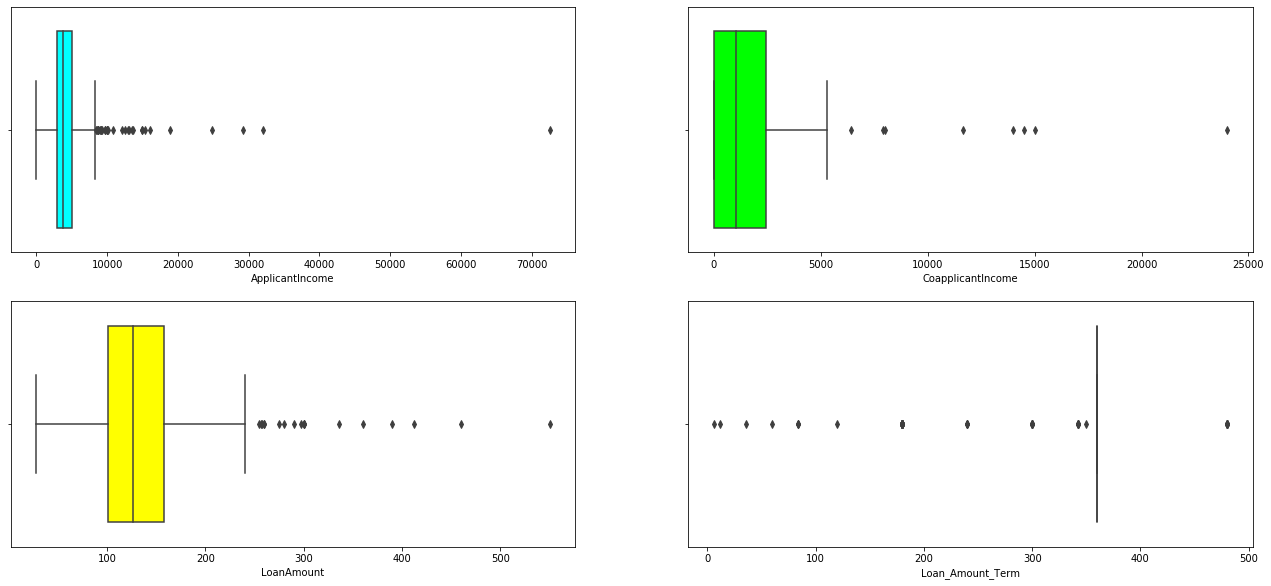

In [21]:
#Train boxplot
import seaborn as sns
tr_num = ["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"]
c = 1
col = ["aqua","lime","yellow","white"]
plt.figure()
for i in tr_num:
    plt.subplot(2,2,c)
    sns.boxplot(Risk_Train_Data[i],boxprops = dict(facecolor = col[c-1]))
    c += 1
plt.subplots_adjust(right = 3,top = 2)
plt.show()

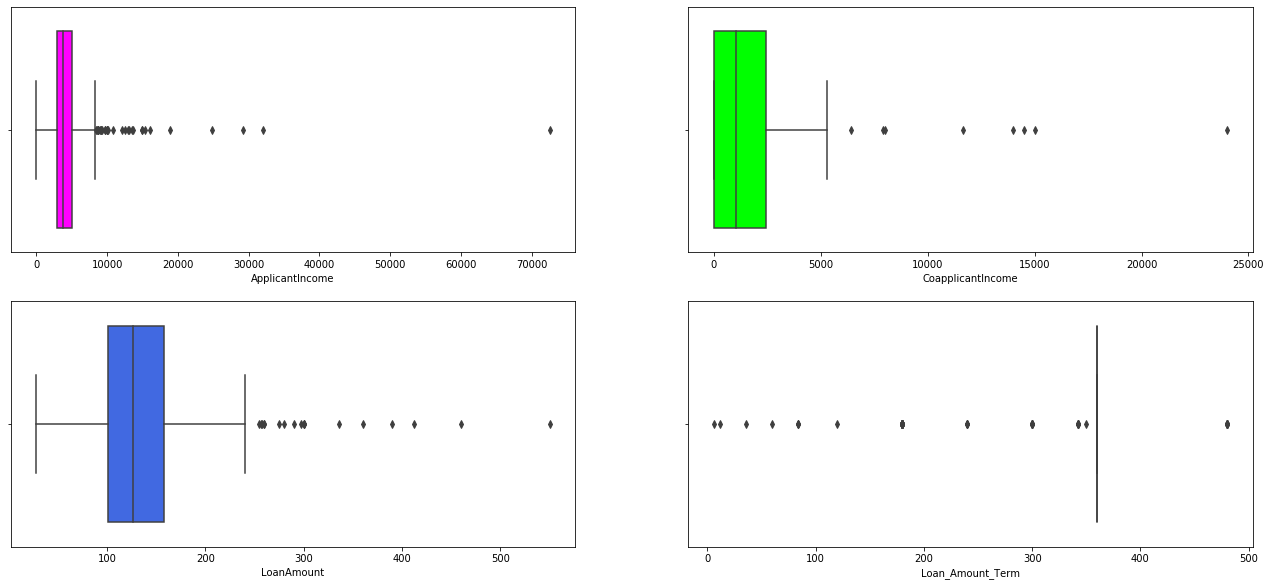

In [22]:
#Test boxplot
te_num = ["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"]
ct = 1
colt = ["magenta","lime","royalblue","white"]
plt.figure()
for i in tr_num:
    plt.subplot(2,2,ct)
    sns.boxplot(Risk_Test_Data[i],boxprops = dict(facecolor = colt[ct-1]))
    ct += 1
plt.subplots_adjust(right = 3,top = 2)
plt.show()

In [23]:
#outlier treatment for numeric columns

#Train Data
p25 = []
p75 = []
iqr = []
iqrll = []
iqrul = []
for i in tr_num:
    p25.append(Risk_Train_Data[i].quantile(q=0.25))
    p75.append(Risk_Train_Data[i].quantile(q=0.75))

for i in range(4):
    iqr.append(p75[i]-p25[i])
    
for i in range(4):
    iqrll.append(p25[i]-1.5*iqr[i])
    iqrul.append(p75[i]+1.5*iqr[i])

j = 0
for i in tr_num:
    Risk_Train_Data.loc[Risk_Train_Data[i]>iqrul[j],i] = Risk_Train_Data[i].quantile(q=0.985)
    Risk_Train_Data.loc[Risk_Train_Data[i]<iqrll[j],i] = Risk_Train_Data[i].quantile(q=0.015)
    j += 1


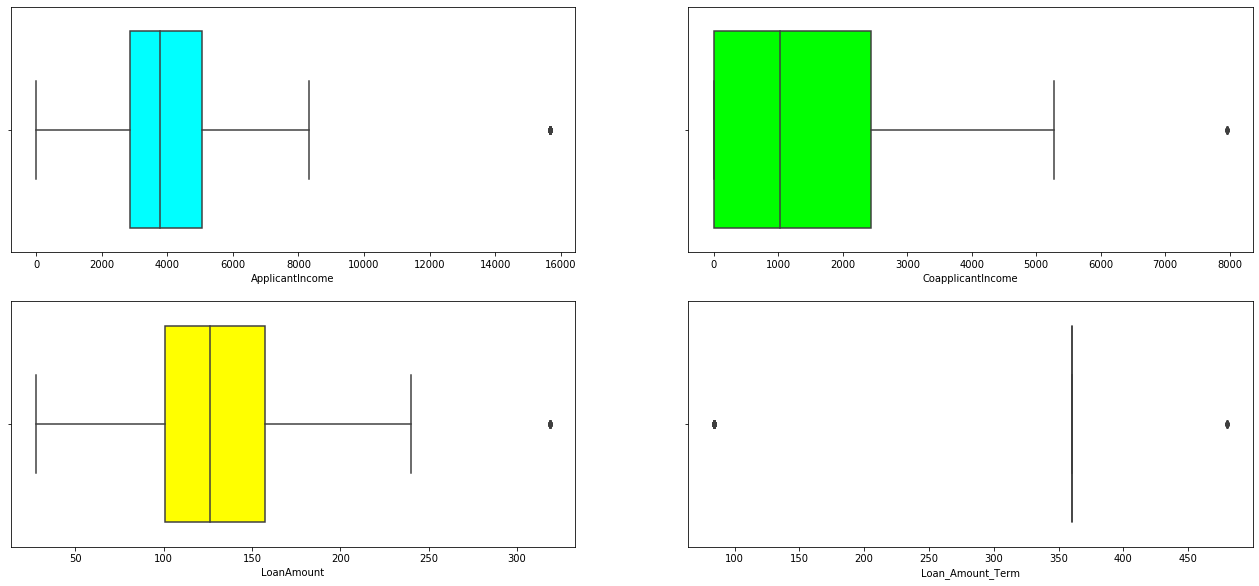

In [24]:
#Train data Box Plot after outlier treatment
tr_num = ["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"]
c = 1
col = ["aqua","lime","yellow","white"]
plt.figure()
for i in tr_num:
    plt.subplot(2,2,c)
    sns.boxplot(Risk_Train_Data[i],boxprops = dict(facecolor = col[c-1]))
    c += 1
plt.subplots_adjust(right = 3,top = 2)
plt.show()

In [25]:
#outlier treatment for numeric columns

#Test Data
p25 = []
p75 = []
iqr = []
iqrll = []
iqrul = []
for i in tr_num:
    p25.append(Risk_Test_Data[i].quantile(q=0.25))
    p75.append(Risk_Test_Data[i].quantile(q=0.75))

for i in range(4):
    iqr.append(p75[i]-p25[i])
    
for i in range(4):
    iqrll.append(p25[i]-1.5*iqr[i])
    iqrul.append(p75[i]+1.5*iqr[i])

j = 0
for i in tr_num:
    Risk_Test_Data.loc[Risk_Test_Data[i]>iqrul[j],i] = Risk_Test_Data[i].quantile(q=0.985)
    Risk_Test_Data.loc[Risk_Test_Data[i]<iqrll[j],i] = Risk_Test_Data[i].quantile(q=0.015)
    j += 1



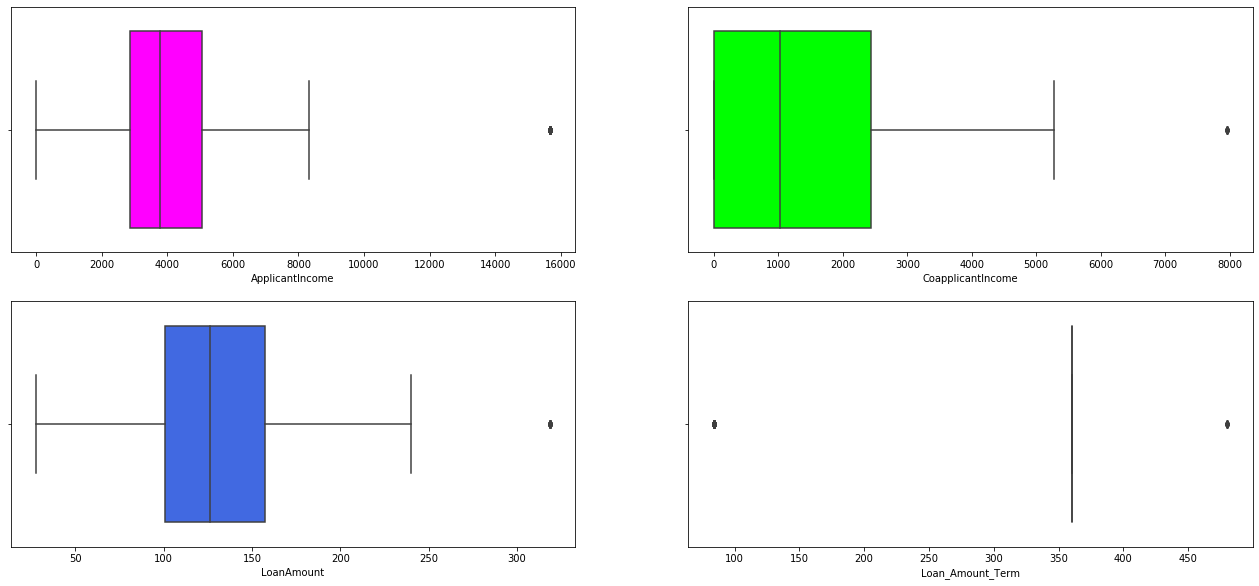

In [26]:
#Test boxplot after outlier treatment
te_num = ["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"]
ct = 1
colt = ["magenta","lime","royalblue","white"]
plt.figure()
for i in tr_num:
    plt.subplot(2,2,ct)
    sns.boxplot(Risk_Test_Data[i],boxprops = dict(facecolor = colt[ct-1]))
    ct += 1
plt.subplots_adjust(right = 3,top = 2)
plt.show()

In [27]:
train_corr = Risk_Train_Data.corr(method = "pearson")
train_corr.to_csv("RiskTrainCorr.csv")

In [28]:
#train
cat_var = ["Gender","Married","Dependents","Education","Self_Employed","Property_Area"]
drop_var = ["Loan_ID","Gender","Married","Dependents","Education","Self_Employed","Property_Area"]
dummies = []
for i in cat_var:
    dummies.append(pd.get_dummies(Risk_Train_Data[i], prefix = i).iloc[:, 1:])
j=0
for i in cat_var:
    Risk_Train_Data = pd.concat([Risk_Train_Data, dummies[j]], axis = 1)
    j += 1
Risk_Train_Data.drop(drop_var, axis = 1, inplace = True)
Risk_Train_Data.describe(include = "all")

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
count,367.000000,367.000000,367.000000,367.000000,367.000000,367,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
unique,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4876.251117,1466.538747,135.842351,326.517711,0.825444,NaN,0.809264,0.634877,0.158038,0.160763,0.108992,0.228883,0.100817,0.316076,0.381471
std,3650.874676,1737.471447,57.420152,95.817131,0.364778,NaN,0.393417,0.482122,0.365275,0.367814,0.312054,0.420687,0.301498,0.465578,0.486411
min,0.000000,0.000000,28.000000,84.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2864.000000,0.000000,101.000000,360.000000,1.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3786.000000,1025.000000,126.000000,360.000000,1.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5060.000000,2430.500000,157.500000,360.000000,1.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000


In [29]:
Risk_Train_Data["Loan_Status"].loc[Risk_Train_Data["Loan_Status"] == 'Y'] = 1
Risk_Train_Data["Loan_Status"].loc[Risk_Train_Data["Loan_Status"] == 'N'] = 0
Risk_Train_Data.describe(include = "all")

C:\Users\Dell\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,4876.251117,1466.538747,135.842351,326.517711,0.825444,0.790191,0.809264,0.634877,0.158038,0.160763,0.108992,0.228883,0.100817,0.316076,0.381471
std,3650.874676,1737.471447,57.420152,95.817131,0.364778,0.407728,0.393417,0.482122,0.365275,0.367814,0.312054,0.420687,0.301498,0.465578,0.486411
min,0.000000,0.000000,28.000000,84.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2864.000000,0.000000,101.000000,360.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3786.000000,1025.000000,126.000000,360.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5060.000000,2430.500000,157.500000,360.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,15662.880000,7958.840000,318.360000,480.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
#test
cat_var = ["Gender","Married","Dependents","Education","Self_Employed","Property_Area"]
drop_var = ["Loan_ID","Gender","Married","Dependents","Education","Self_Employed","Property_Area"]
dummiest = []
for i in cat_var:
    dummiest.append(pd.get_dummies(Risk_Test_Data[i], prefix = i).iloc[:, 1:])
j=0
for i in cat_var:
    Risk_Test_Data = pd.concat([Risk_Test_Data, dummiest[j]], axis = 1)
    j += 1
Risk_Test_Data.drop(drop_var, axis = 1, inplace = True)
Risk_Test_Data.describe(include = "all")

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
count,367.000000,367.000000,367.000000,367.000000,367.000000,367,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
unique,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4876.251117,1466.538747,135.842351,326.517711,0.825444,NaN,0.809264,0.634877,0.158038,0.160763,0.108992,0.228883,0.100817,0.316076,0.381471
std,3650.874676,1737.471447,57.420152,95.817131,0.364778,NaN,0.393417,0.482122,0.365275,0.367814,0.312054,0.420687,0.301498,0.465578,0.486411
min,0.000000,0.000000,28.000000,84.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2864.000000,0.000000,101.000000,360.000000,1.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3786.000000,1025.000000,126.000000,360.000000,1.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5060.000000,2430.500000,157.500000,360.000000,1.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000


In [31]:
Risk_Test_Data["Loan_Status"].loc[Risk_Test_Data["Loan_Status"] == 'Y'] = 1
Risk_Test_Data["Loan_Status"].loc[Risk_Test_Data["Loan_Status"] == 'N'] = 0
Risk_Test_Data.describe(include = "all")

C:\Users\Dell\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,4876.251117,1466.538747,135.842351,326.517711,0.825444,0.790191,0.809264,0.634877,0.158038,0.160763,0.108992,0.228883,0.100817,0.316076,0.381471
std,3650.874676,1737.471447,57.420152,95.817131,0.364778,0.407728,0.393417,0.482122,0.365275,0.367814,0.312054,0.420687,0.301498,0.465578,0.486411
min,0.000000,0.000000,28.000000,84.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2864.000000,0.000000,101.000000,360.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3786.000000,1025.000000,126.000000,360.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5060.000000,2430.500000,157.500000,360.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,15662.880000,7958.840000,318.360000,480.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


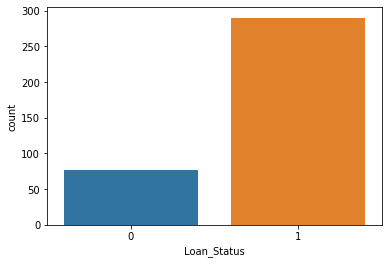

In [32]:
sns.countplot(x = "Loan_Status", data = Risk_Train_Data)

In [33]:
ind_var = ["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History","Gender_Male","Married_Yes","Dependents_1","Dependents_2","Dependents_3+","Education_Not Graduate","Self_Employed_Yes","Property_Area_Semiurban","Property_Area_Urban"]
x = Risk_Train_Data[ind_var]
y = Risk_Train_Data["Loan_Status"]

In [34]:
#Model Iteration 1
CreditModel1 = LogisticRegression()
CreditModel1.fit(x,y)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
x_test = Risk_Test_Data[ind_var]
y_test = Risk_Test_Data["Loan_Status"]

In [36]:
y_pred1 = CreditModel1.predict(x_test)
print(y_pred1)

[1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


In [37]:
print("Accuracy of Model Iteration 1 for test data: {:.2f}".format(metrics.accuracy_score(y_test,y_pred1)))

Accuracy of Model Iteration 1 for test data: 0.95


In [38]:
#Getting confusion matrix

from sklearn.metrics import confusion_matrix
conmat = confusion_matrix(y_test,y_pred1)
print(conmat)

[[ 58  19]
 [  1 289]]


In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.98      0.75      0.85        77
           1       0.94      1.00      0.97       290

    accuracy                           0.95       367
   macro avg       0.96      0.87      0.91       367
weighted avg       0.95      0.95      0.94       367



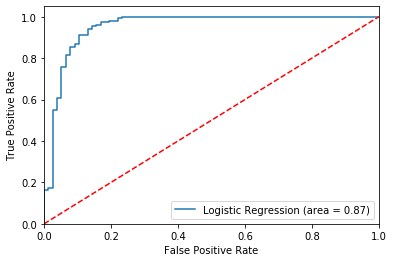

In [40]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
credit_roc_auc = roc_auc_score(y_test,y_pred1)
fpr,tpr,thresholds = roc_curve(y_test,CreditModel1.predict_proba(x_test)[:,1])

plt.figure()
plt.plot(fpr,tpr,label = "Logistic Regression (area = %0.2f)" % credit_roc_auc)
plt.plot([0,1],[0,1],"r--")
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.05)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

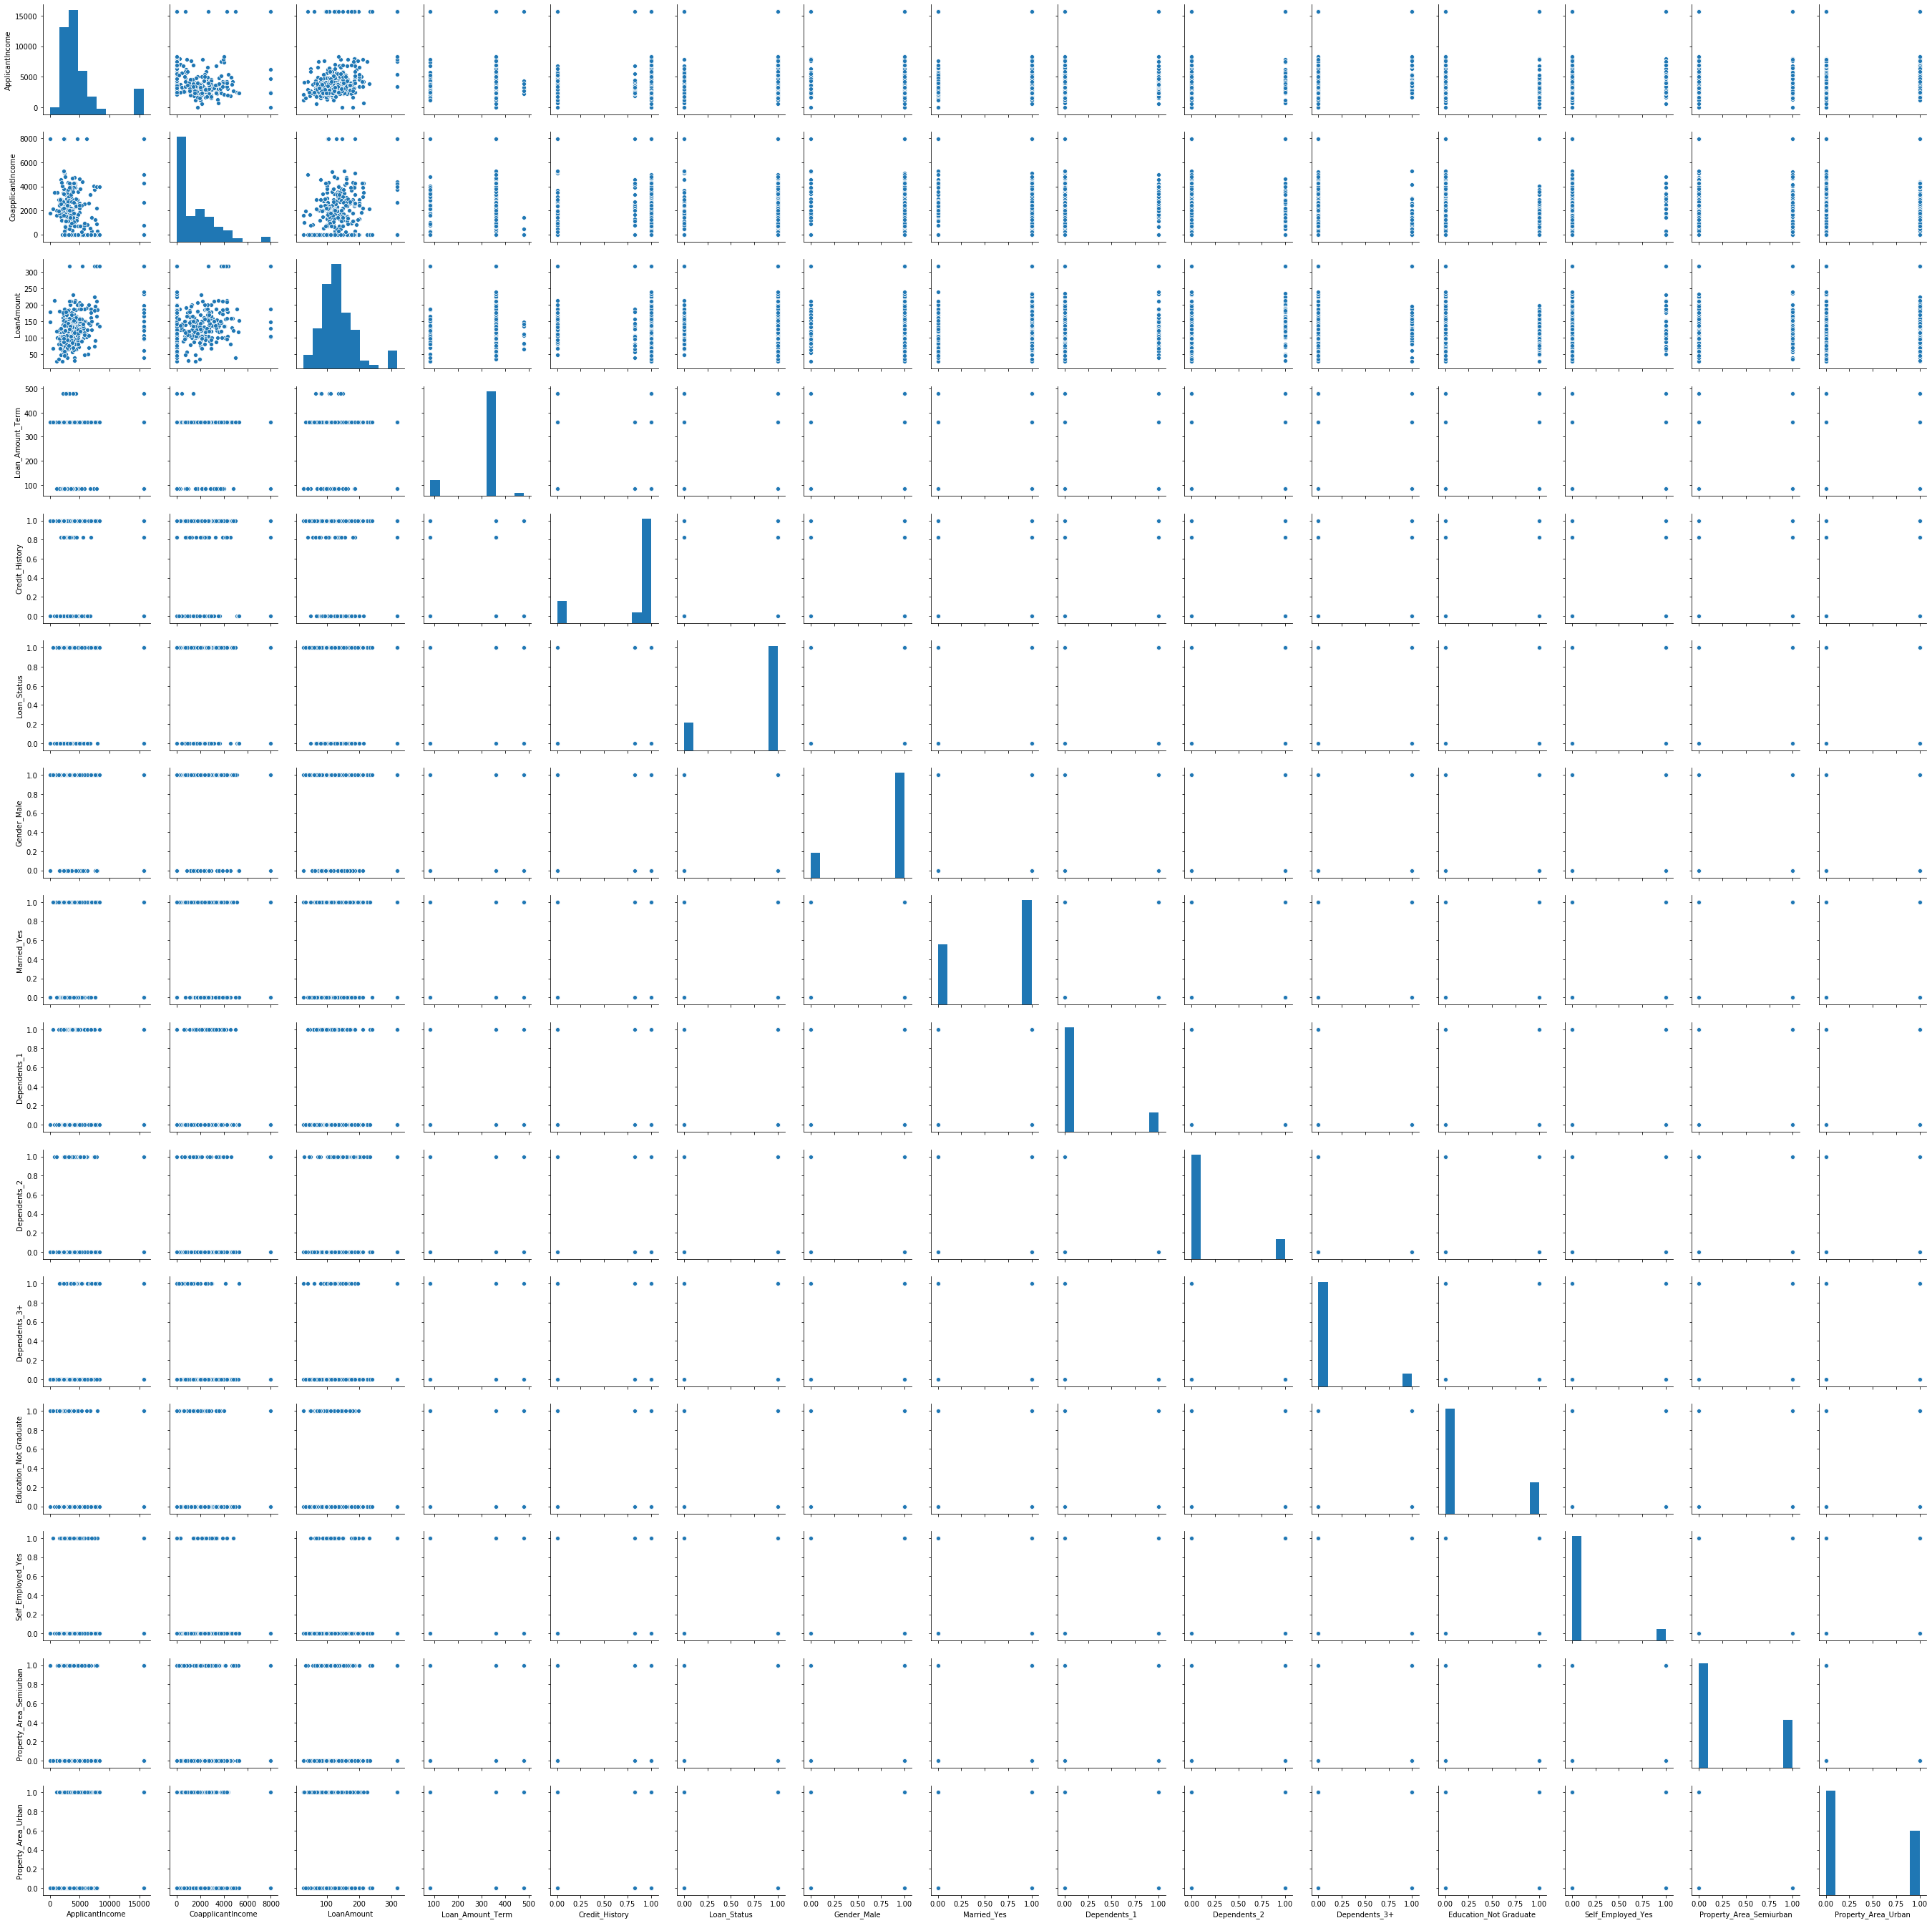

In [41]:
sns.pairplot(Risk_Train_Data)
plt.show()

In [42]:
Risk_Train_Data.describe(include = "all")

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,4876.251117,1466.538747,135.842351,326.517711,0.825444,0.790191,0.809264,0.634877,0.158038,0.160763,0.108992,0.228883,0.100817,0.316076,0.381471
std,3650.874676,1737.471447,57.420152,95.817131,0.364778,0.407728,0.393417,0.482122,0.365275,0.367814,0.312054,0.420687,0.301498,0.465578,0.486411
min,0.000000,0.000000,28.000000,84.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2864.000000,0.000000,101.000000,360.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3786.000000,1025.000000,126.000000,360.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5060.000000,2430.500000,157.500000,360.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,15662.880000,7958.840000,318.360000,480.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [60]:
Risk_Train_Data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,4876.251117,1466.538747,135.842351,326.517711,0.825444,0.790191,0.809264,0.634877,0.158038,0.160763,0.108992,0.228883,0.100817,0.316076,0.381471
std,3650.874676,1737.471447,57.420152,95.817131,0.364778,0.407728,0.393417,0.482122,0.365275,0.367814,0.312054,0.420687,0.301498,0.465578,0.486411
min,0.000000,0.000000,28.000000,84.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2864.000000,0.000000,101.000000,360.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3786.000000,1025.000000,126.000000,360.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5060.000000,2430.500000,157.500000,360.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,15662.880000,7958.840000,318.360000,480.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
Risk_Test_Data["Income_Status"] = ""
for i in range(367):
    if (Risk_Test_Data["ApplicantIncome"][i] > 4500) and (Risk_Test_Data["CoapplicantIncome"][i] > 2000):
        Risk_Test_Data["Income_Status"][i] = "VeryGood"
    elif ((Risk_Test_Data["ApplicantIncome"][i] > 3000 and Risk_Test_Data["ApplicantIncome"][i] <= 4500) and (Risk_Test_Data["CoapplicantIncome"][i] > 1000 and Risk_Test_Data["CoapplicantIncome"][i] <= 2000)) or (Risk_Test_Data["ApplicantIncome"][i] > 5500 and Risk_Test_Data["CoapplicantIncome"][i] < 500):
        Risk_Test_Data["Income_Status"][i] = "Good"
    elif ((Risk_Test_Data["ApplicantIncome"][i] > 1500 and Risk_Test_Data["ApplicantIncome"][i] <= 3000) and (Risk_Test_Data["CoapplicantIncome"][i] > 500 and Risk_Test_Data["CoapplicantIncome"][i] <= 1000)) or ((Risk_Test_Data["ApplicantIncome"][i] > 2500 and Risk_Test_Data["ApplicantIncome"][i] <= 5500) and Risk_Test_Data["CoapplicantIncome"][i] < 500):
        Risk_Test_Data["Income_Status"][i] = "Avg"
    else:
        Risk_Test_Data["Income_Status"][i] = "Bad"

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A va

In [50]:
f1dummyt = pd.get_dummies(Risk_Test_Data["Income_Status"], prefix = "Income_Status").iloc[:, 1:]
Risk_Test_Data = pd.concat([Risk_Test_Data, f1dummyt], axis = 1)
Risk_Test_Data.drop("Income_Status", axis = 1, inplace = True)

In [51]:
Risk_Test_Data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Income_Status_Bad,Income_Status_Good,Income_Status_VeryGood
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,4876.251117,1466.538747,135.842351,326.517711,0.825444,0.790191,0.809264,0.634877,0.158038,0.160763,0.108992,0.228883,0.100817,0.316076,0.381471,0.427793,0.223433,0.070845
std,3650.874676,1737.471447,57.420152,95.817131,0.364778,0.407728,0.393417,0.482122,0.365275,0.367814,0.312054,0.420687,0.301498,0.465578,0.486411,0.495434,0.417115,0.256915
min,0.000000,0.000000,28.000000,84.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2864.000000,0.000000,101.000000,360.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3786.000000,1025.000000,126.000000,360.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5060.000000,2430.500000,157.500000,360.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,15662.880000,7958.840000,318.360000,480.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
invar = list(Risk_Train_Data.columns)
invar.remove('Loan_Status')
x = Risk_Train_Data[invar]
y = Risk_Train_Data["Loan_Status"]

In [53]:
#Model Iteration 2
CreditModel2 = LogisticRegression()
CreditModel2.fit(x,y)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
x_test = Risk_Test_Data[invar]
y_test = Risk_Test_Data["Loan_Status"]

In [55]:
y_pred2 = CreditModel2.predict(x_test)
print(y_pred2)

[1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


In [56]:
print("Accuracy of Model Iteration 2 for test data: {:.2f}".format(metrics.accuracy_score(y_test,y_pred2)))

Accuracy of Model Iteration 2 for test data: 0.95


In [57]:
conmat2 = confusion_matrix(y_test,y_pred2)
print(conmat2)

[[ 58  19]
 [  1 289]]


In [58]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.98      0.75      0.85        77
           1       0.94      1.00      0.97       290

    accuracy                           0.95       367
   macro avg       0.96      0.87      0.91       367
weighted avg       0.95      0.95      0.94       367



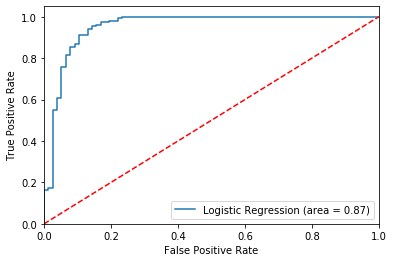

In [59]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
credit_roc_auc = roc_auc_score(y_test,y_pred2)
fpr,tpr,thresholds = roc_curve(y_test,CreditModel2.predict_proba(x_test)[:,1])

plt.figure()
plt.plot(fpr,tpr,label = "Logistic Regression (area = %0.2f)" % credit_roc_auc)
plt.plot([0,1],[0,1],"r--")
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.05)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

In [62]:
y_test.to_excel('test.xlsx', sheet_name='sheet1', index=False)

In [64]:
from IPython.display import HTML
import base64  
import pandas as pd  

def create_download_link( y_test, title = "Download CSV file", filename = "data.csv"):  
    csv = df.to_csv(index =False)
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)